# 🛒 Supermarket Data Analysis Project

## 📘 Descripción general
Este proyecto tiene como objetivo analizar datos reales de un supermercado con el fin de **comprender la dinámica del negocio, sus pérdidas, márgenes y oportunidades de mejora**.  
A partir de múltiples fuentes de información (catálogo de productos, ventas diarias, precios mayoristas y tasas de pérdida), buscamos construir una visión integral del funcionamiento operativo y financiero.

---

## 🎯 Objetivo principal
Desarrollar un análisis que permita **entender mejor la historia y realidad del negocio**, detectando patrones de venta, eficiencia logística y rentabilidad, para apoyar la **toma de decisiones basadas en datos**.

---

## 📂 Estructura de los datos
Los datos provienen de cuatro archivos CSV que representan distintas áreas del negocio:

| Archivo | Descripción | Columnas clave |
|----------|--------------|----------------|
| **annex1.csv** | Catálogo de productos y sus categorías | `Item Code`, `Item Name`, `Category Code`, `Category Name` |
| **annex2.csv** | Registro de ventas diarias | `Date`, `Time`, `Item Code`, `Quantity Sold (kilo)`, `Unit Selling Price (RMB/kg)`, `Sale or Return`, `Discount (Yes/No)` |
| **annex3.csv** | Precio mayorista de compra de cada producto | `Date`, `Item Code`, `Wholesale Price (RMB/kg)` |
| **annex4.csv** | Tasa de pérdida o desperdicio estimada por producto | `Item Code`, `Item Name`, `Loss Rate (%)` |

---

## 💡 Preguntas guía
El análisis busca responder a preguntas clave como:
- ¿Cuáles son los productos y categorías más rentables?
- ¿Qué impacto tiene el *Loss Rate (%)* en la ganancia real?
- ¿En qué horarios o días se concentran las mayores ventas?
- ¿Qué productos presentan altos niveles de pérdida o desperdicio?
- ¿Cómo se relacionan los descuentos con el volumen de ventas?

---

## 📊 Enfoque analítico
1. **Exploración inicial (EDA):** revisión de estructura, valores nulos y consistencia entre datasets.  
2. **Integración de datos:** unión de los archivos mediante `Item Code`.  
3. **Análisis de ventas:** tendencias, horarios, descuentos y volumen.  
4. **Análisis de rentabilidad:** comparación entre precio de venta y precio mayorista.  
5. **Evaluación de pérdidas:** impacto del *Loss Rate* sobre márgenes.  
6. **Conclusiones y recomendaciones estratégicas.**

---

## 🚀 Propósito final
El propósito es ofrecer **insights claros y accionables** sobre:
- Qué productos generan valor sostenido.  
- Dónde se concentran las pérdidas económicas.  
- Cómo optimizar decisiones de inventario, precios y compras.  

Este análisis busca ser la base para **estrategias de reducción de pérdidas y aumento de rentabilidad** en el supermercado.

---


In [1]:
import pandas as pd

In [3]:
import os
print(os.getcwd())

C:\Users\nicog\Documents\Proyectos Personales\Supermarket


In [5]:
import pandas as pd

# Ruta base
ruta_base = "C:/Users/nicog/Documents/Proyectos Personales/Supermarket/data/"

# Lectura directa de cada archivo a un DataFrame
annex1_df = pd.read_csv(ruta_base + "annex1.csv")
annex2_df = pd.read_csv(ruta_base + "annex2.csv")
annex3_df = pd.read_csv(ruta_base + "annex3.csv")
annex4_df = pd.read_csv(ruta_base + "annex4.csv")

# Confirmar que se cargaron correctamente
for i, df in enumerate([annex1_df, annex2_df, annex3_df, annex4_df], start=1):
    print(f"annex{i}_df -> {df.shape[0]} filas x {df.shape[1]} columnas")

annex1_df -> 251 filas x 4 columnas
annex2_df -> 878503 filas x 7 columnas
annex3_df -> 55982 filas x 3 columnas
annex4_df -> 251 filas x 3 columnas


In [6]:
annex1_df.head()

,Item Code,Item Name,Category Code,Category Name
0,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables
1,102900005115199,Sichuan Red Cedar,1011010101,Flower/Leaf Vegetables
2,102900005115625,Local Xiaomao Cabbage,1011010101,Flower/Leaf Vegetables
3,102900005115748,White Caitai,1011010101,Flower/Leaf Vegetables
4,102900005115762,Amaranth,1011010101,Flower/Leaf Vegetables


In [7]:
annex2_df.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No


In [8]:
annex3_df.head()

,Date,Item Code,Wholesale Price (RMB/kg)
0,2020-07-01,102900005115762,3.88
1,2020-07-01,102900005115779,6.72
2,2020-07-01,102900005115786,3.19
3,2020-07-01,102900005115793,9.24
4,2020-07-01,102900005115823,7.03


In [9]:
annex4_df.head()

,Item Code,Item Name,Loss Rate (%)
0,102900005115168,Niushou Shengcai,4.39
1,102900005115199,Sichuan Red Cedar,10.46
2,102900005115250,Xixia Black Mushroom (1),10.80
3,102900005115625,Local Xiaomao Cabbage,0.18
4,102900005115748,White Caitai,8.78


In [26]:
# Combinar datasets
merged = annex2_df.merge(annex3_df, on=['Date', 'Item Code'], how='left')
merged = merged.merge(annex4_df[['Item Code', 'Loss Rate (%)']], on='Item Code', how='left')
merged = merged.merge(annex1_df[['Item Code', 'Item Name', 'Category Name']], on='Item Code', how='left')

# Calcular costo ajustado y rentabilidad
merged['Costo ajustado'] = merged['Wholesale Price (RMB/kg)'] * (1 + merged['Loss Rate (%)'] / 100)
merged['Rentabilidad (%)'] = (
    (merged['Unit Selling Price (RMB/kg)'] - merged['Costo ajustado']) /
    merged['Costo ajustado']
) * 100

# Rentabilidad por producto
rentabilidad_prod = (
    merged.groupby('Item Name')['Rentabilidad (%)']
    .mean()
    .sort_values(ascending=False)
)

print(rentabilidad_prod.head(10))

Item Name
Needle Mushroom (Bag)        3098.391666
Wild Lotus Root (2)          2589.000569
Agaricus Bisporus (Bag)       878.562269
The Steak Mushrooms (Box)     831.562567
Green Eggplant (2)            742.784084
High Melon (2)                575.804630
Net Lotus Root (3)            545.550010
Pepper Mix                    459.017609
Ganlanye                      437.730776
Purple Beicai                 415.458958
Name: Rentabilidad (%), dtype: float64


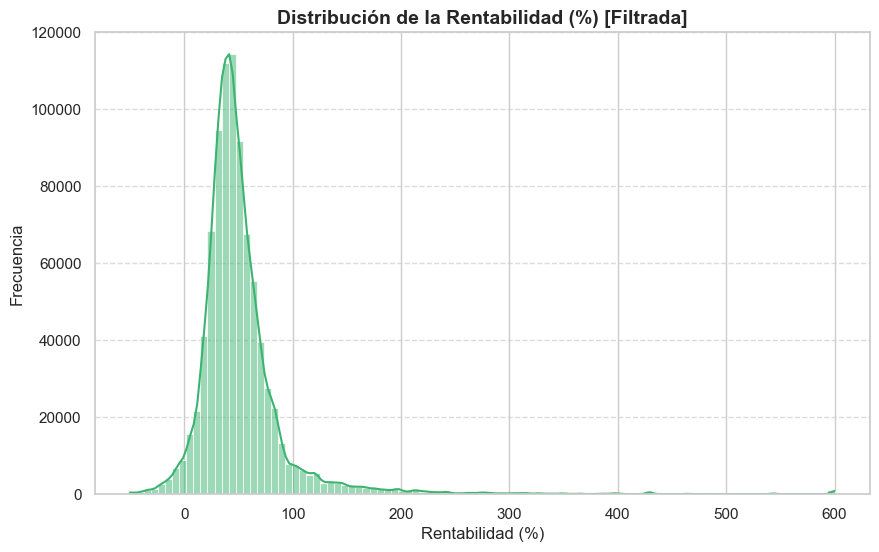

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Recortar valores extremos (winsorización ligera)
rentabilidad_clip = merged['Rentabilidad (%)'].clip(lower=-50, upper=600)

plt.figure(figsize=(10,6))
sns.histplot(rentabilidad_clip, bins=100, kde=True, color='mediumseagreen')
plt.title('Distribución de la Rentabilidad (%) [Filtrada]', fontsize=14, weight='bold')
plt.xlabel('Rentabilidad (%)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [28]:
merged[['Item Name', 'Unit Selling Price (RMB/kg)', 'Wholesale Price (RMB/kg)', 'Loss Rate (%)', 'Rentabilidad (%)']].sample(10)

,Item Name,Unit Selling Price (RMB/kg),Wholesale Price (RMB/kg),Loss Rate (%),Rentabilidad (%)
386580,Hongshujian,4.0,2.00,8.42,84.467810
645851,Xiaozhoupi (Bag),2.0,1.16,9.43,57.556240
845694,Zhuyecai,8.0,5.81,13.62,21.187847
620310,Millet Pepper (Bag),4.9,1.16,9.43,286.012787
603891,Wuhu Green Pepper (1),12.0,8.60,5.70,32.010297
610888,Net Lotus Root (1),10.0,6.67,5.54,42.055180
160915,Sweet Chinese Cabbage,6.0,3.06,9.43,79.181606
519451,Broccoli,8.0,5.09,9.26,43.850378
260945,White Caitai,4.0,2.60,8.78,41.428713
454426,Net Lotus Root (1),6.0,4.60,5.54,23.588007


In [29]:
merged[['Unit Selling Price (RMB/kg)', 'Wholesale Price (RMB/kg)']].describe()

,Unit Selling Price (RMB/kg),Wholesale Price (RMB/kg)
count,878503.000000,878503.000000
mean,8.917144,5.663150
std,6.311265,4.229638
min,0.100000,0.010000
25%,4.900000,3.000000
50%,7.900000,4.690000
75%,10.800000,7.010000
max,119.900000,141.000000


In [19]:
merged[(merged['Wholesale Price (RMB/kg)'] < 0.5) | 
       (merged['Wholesale Price (RMB/kg)'] > 50) |
       (merged['Unit Selling Price (RMB/kg)'] > 50)]


,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Wholesale Price (RMB/kg),Loss Rate (%),Category Name,Costo ajustado,Rentabilidad (%),Item Name
71243,2020-09-02,09:24:01.594,102900005125808,0.175,8.0,sale,No,0.40,5.86,Capsicum,0.423440,1789.287739,Millet Pepper
71316,2020-09-02,10:02:58.107,102900005125808,0.125,8.0,sale,No,0.40,5.86,Capsicum,0.423440,1789.287739,Millet Pepper
71387,2020-09-02,10:37:09.484,102900005125808,0.038,8.0,sale,No,0.40,5.86,Capsicum,0.423440,1789.287739,Millet Pepper
71395,2020-09-02,10:39:11.389,102900005125808,0.251,8.0,sale,No,0.40,5.86,Capsicum,0.423440,1789.287739,Millet Pepper
71442,2020-09-02,11:10:50.755,102900005125808,0.201,8.0,sale,No,0.40,5.86,Capsicum,0.423440,1789.287739,Millet Pepper
...,...,...,...,...,...,...,...,...,...,...,...,...,...
848067,2023-05-11,20:10:23.57,102900005128748,0.162,23.9,sale,Yes,65.36,16.89,Flower/Leaf Vegetables,76.399304,-68.716993,Huanghuacai
848082,2023-05-11,20:28:51.823,102900005128748,0.146,23.9,sale,Yes,65.36,16.89,Flower/Leaf Vegetables,76.399304,-68.716993,Huanghuacai
849499,2023-05-13,20:01:34.195,102900005128748,0.168,79.6,sale,No,65.36,16.89,Flower/Leaf Vegetables,76.399304,4.189431,Huanghuacai
857196,2023-05-26,21:00:00.224,102900011011058,0.330,47.8,sale,Yes,61.27,10.17,Edible Mushroom,67.501159,-29.186401,Black Porcini


In [20]:
suspect_low = merged[merged['Wholesale Price (RMB/kg)'] < 1]
suspect_high = merged[merged['Wholesale Price (RMB/kg)'] > 50]

print("Costos anómalos (muy bajos):", len(suspect_low))
print("Costos anómalos (muy altos):", len(suspect_high))


Costos anómalos (muy bajos): 20261
Costos anómalos (muy altos): 128


In [21]:
merged_clean = merged[
    (merged['Wholesale Price (RMB/kg)'] >= 0.5) &
    (merged['Wholesale Price (RMB/kg)'] <= 50)
]

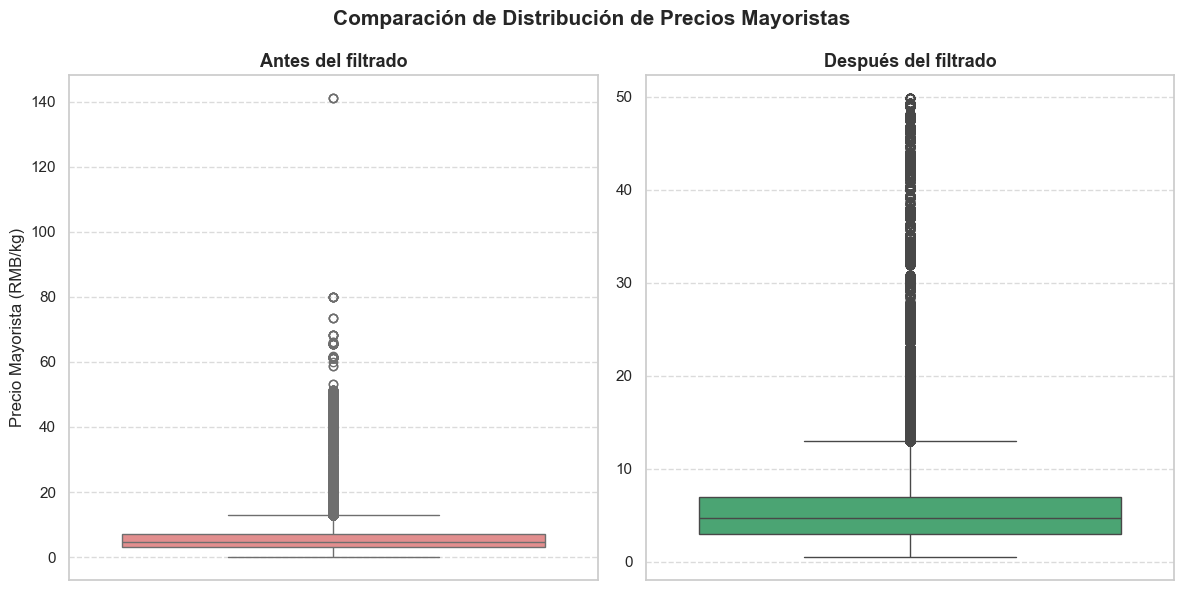

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Activar estilo limpio
sns.set(style="whitegrid")

# Crear figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# --- BOX 1: Precios mayoristas (sin filtrar) ---
sns.boxplot(
    y=merged['Wholesale Price (RMB/kg)'],
    color='lightcoral',
    ax=axes[0]
)
axes[0].set_title('Antes del filtrado', fontsize=13, weight='bold')
axes[0].set_ylabel('Precio Mayorista (RMB/kg)')
axes[0].set_xlabel('')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# --- BOX 2: Precios mayoristas (filtrados) ---
sns.boxplot(
    y=merged_clean['Wholesale Price (RMB/kg)'],
    color='mediumseagreen',
    ax=axes[1]
)
axes[1].set_title('Después del filtrado', fontsize=13, weight='bold')
axes[1].set_ylabel('')
axes[1].set_xlabel('')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle('Comparación de Distribución de Precios Mayoristas', fontsize=15, weight='bold')
plt.tight_layout()
plt.show()


In [31]:
# Filtrar solo ventas con descuento
descuentos = merged[merged['Discount (Yes/No)'] == 'Yes']
print(f"Total de transacciones con descuento: {len(descuentos):,}")


Total de transacciones con descuento: 47,366


In [32]:
# Casos con descuento y rentabilidad negativa
descuentos_negativos = descuentos[descuentos['Rentabilidad (%)'] < 0]
print(f"De esas, {len(descuentos_negativos):,} tienen rentabilidad negativa.")


De esas, 13,693 tienen rentabilidad negativa.


In [33]:
# Por categoría
perdidas_cat = (
    descuentos_negativos['Category Name']
    .value_counts()
    .head(10)
)
print("Categorías con más rentabilidades negativas en descuentos:")
print(perdidas_cat)

# Por producto
perdidas_prod = (
    descuentos_negativos['Item Name']
    .value_counts()
    .head(10)
)
print("\nProductos con más pérdidas en descuentos:")
print(perdidas_prod)


Categorías con más rentabilidades negativas en descuentos:
Category Name
Flower/Leaf Vegetables         5055
Edible Mushroom                3609
Capsicum                       1972
Aquatic Tuberous Vegetables    1397
Cabbage                        1299
Solanum                         361
Name: count, dtype: int64

Productos con más pérdidas en descuentos:
Item Name
Zhijiang Qinggengsanhua      1032
Yunnan Lettuce (Bag)          786
Apricot Bao Mushroom (2)      725
Yunnan Leaf Lettuce (Bag)     713
Needle Mushroom (Box)         662
Spinach (Bag)                 605
Net Lotus Root (1)            512
Agaricus Bisporus (Box)       401
Yunnan Shengcai               395
Luosi Pepper (Bag)            386
Name: count, dtype: int64


In [34]:
# Separar ventas con y sin descuento
con_descuento = merged[merged['Discount (Yes/No)'] == 'Yes']
sin_descuento = merged[merged['Discount (Yes/No)'] == 'No']

# Calcular cuántas tienen rentabilidad negativa
neg_con_descuento = (con_descuento['Rentabilidad (%)'] < 0).sum()
neg_sin_descuento = (sin_descuento['Rentabilidad (%)'] < 0).sum()

# Totales
total_con = len(con_descuento)
total_sin = len(sin_descuento)

print(f"Con descuento: {neg_con_descuento:,} de {total_con:,} ({(neg_con_descuento/total_con)*100:.2f}%) con rentabilidad negativa")
print(f"Sin descuento: {neg_sin_descuento:,} de {total_sin:,} ({(neg_sin_descuento/total_sin)*100:.2f}%) con rentabilidad negativa")


Con descuento: 13,693 de 47,366 (28.91%) con rentabilidad negativa
Sin descuento: 8,922 de 831,137 (1.07%) con rentabilidad negativa


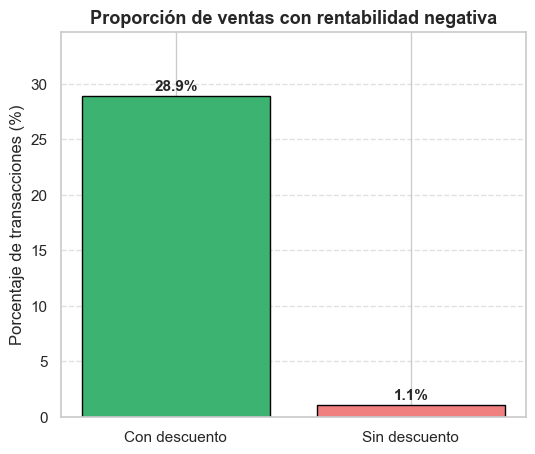

In [35]:
import matplotlib.pyplot as plt

labels = ['Con descuento', 'Sin descuento']
values = [
    (neg_con_descuento / total_con) * 100,
    (neg_sin_descuento / total_sin) * 100
]

plt.figure(figsize=(6,5))
bars = plt.bar(labels, values, color=['mediumseagreen', 'lightcoral'], edgecolor='black')
plt.title('Proporción de ventas con rentabilidad negativa', fontsize=13, weight='bold')
plt.ylabel('Porcentaje de transacciones (%)')

# Mostrar valores encima de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"{yval:.1f}%", ha='center', fontsize=11, weight='bold')

plt.ylim(0, max(values)*1.2)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


Aproximadamente el 1 de cada 3 productos en descuento, tiene rentabilidad negativa, habria que evaluar el impacto que tiene vender los productos de esta forma para el negocio

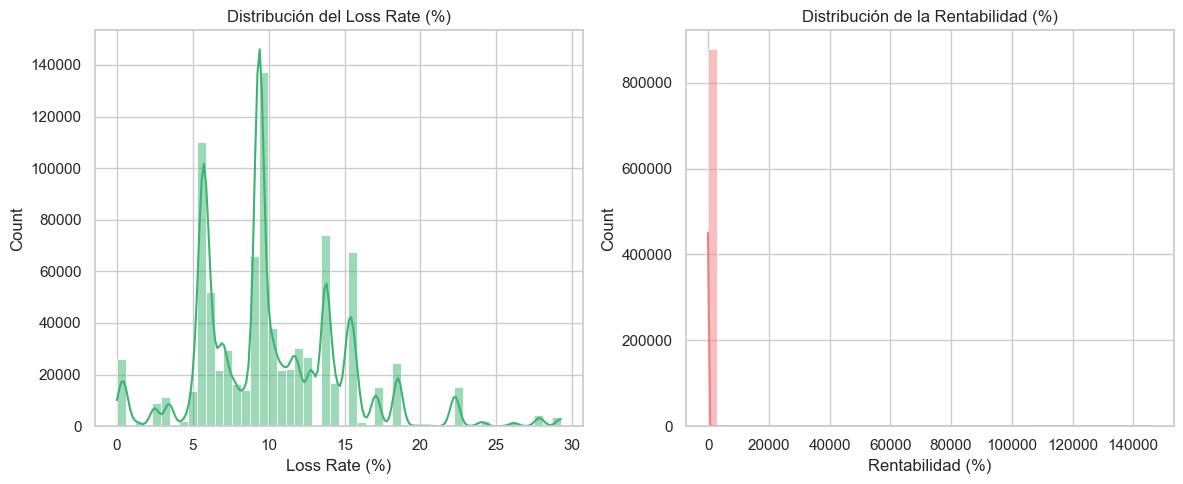

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(merged['Loss Rate (%)'], bins=50, kde=True, ax=axes[0], color='mediumseagreen')
axes[0].set_title('Distribución del Loss Rate (%)')

sns.histplot(merged['Rentabilidad (%)'], bins=50, kde=True, ax=axes[1], color='lightcoral')
axes[1].set_title('Distribución de la Rentabilidad (%)')

plt.tight_layout()
plt.show()


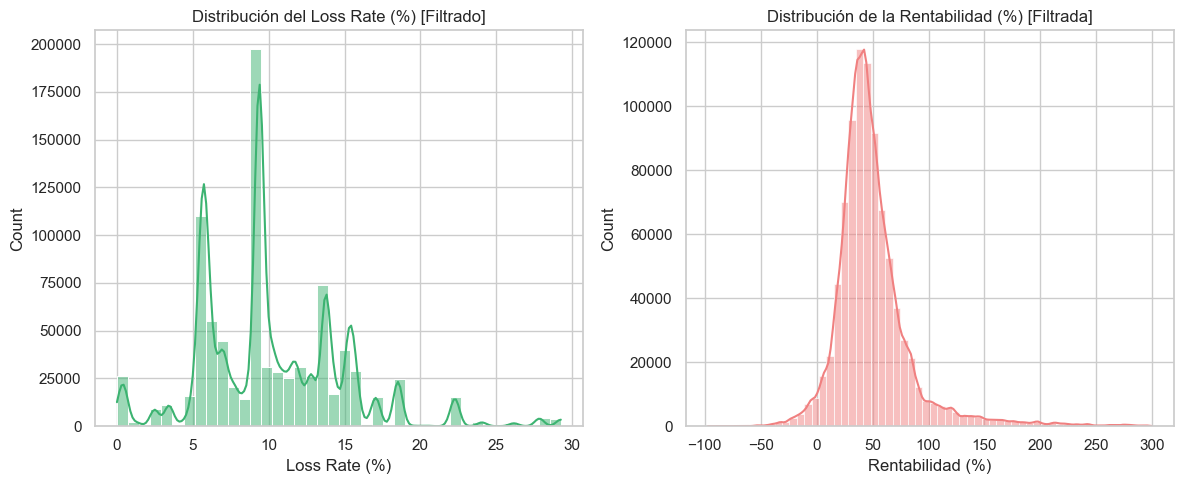

📊 Resultados de correlación entre Loss Rate y Rentabilidad:
- Pearson: -0.103 → relación débil (lineal)
- Spearman: -0.082 → sin relación significativa (monotónica)


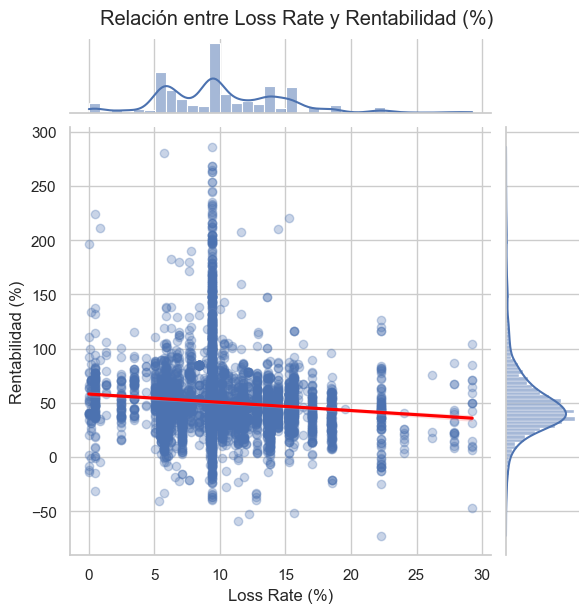

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ===============================
# 1️⃣ Filtrado de outliers
# ===============================
# Mantener solo valores razonables de rentabilidad (p. ej. -100% a 300%)
filtered = merged[
    (merged['Rentabilidad (%)'] > -100) &
    (merged['Rentabilidad (%)'] < 300)
].copy()

# ===============================
# 2️⃣ Visualización después del filtrado
# ===============================
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(filtered['Loss Rate (%)'], bins=40, kde=True, color='mediumseagreen', ax=axes[0])
axes[0].set_title('Distribución del Loss Rate (%) [Filtrado]')

sns.histplot(filtered['Rentabilidad (%)'], bins=60, kde=True, color='lightcoral', ax=axes[1])
axes[1].set_title('Distribución de la Rentabilidad (%) [Filtrada]')

plt.tight_layout()
plt.show()

# ===============================
# 3️⃣ Calcular correlaciones
# ===============================
corr_pearson = filtered[['Loss Rate (%)', 'Rentabilidad (%)']].corr(method='pearson').iloc[0, 1]
corr_spearman = filtered[['Loss Rate (%)', 'Rentabilidad (%)']].corr(method='spearman').iloc[0, 1]

# ===============================
# 4️⃣ Interpretación automática
# ===============================
def interpretar_corr(valor):
    if abs(valor) < 0.1:
        return "sin relación significativa"
    elif abs(valor) < 0.4:
        return "relación débil"
    elif abs(valor) < 0.7:
        return "relación moderada"
    else:
        return "relación fuerte"

print("📊 Resultados de correlación entre Loss Rate y Rentabilidad:")
print(f"- Pearson: {corr_pearson:.3f} → {interpretar_corr(corr_pearson)} (lineal)")
print(f"- Spearman: {corr_spearman:.3f} → {interpretar_corr(corr_spearman)} (monotónica)")

# ===============================
# 5️⃣ Visualización conjunta
# ===============================
sns.jointplot(
    data=filtered.sample(5000),
    x='Loss Rate (%)',
    y='Rentabilidad (%)',
    kind='reg',
    scatter_kws={'alpha':0.3},
    line_kws={'color':'red'}
)
plt.suptitle('Relación entre Loss Rate y Rentabilidad (%)', y=1.02)
plt.show()


El Loss Rate no tiene una correlacion representativa con la rentabilidad, por lo tanto ya es algo de como se estan vendiendo los productos

📊 Rentabilidad mediana por categoría (%):
Category Name
Flower/Leaf Vegetables         48.192057
Solanum                        47.596656
Capsicum                       43.780212
Edible Mushroom                43.506750
Cabbage                        40.043077
Aquatic Tuberous Vegetables    34.398306
Name: Rentabilidad (%), dtype: float64


C:\Users\nicog\AppData\Local\Temp\ipykernel_34312\2277589161.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


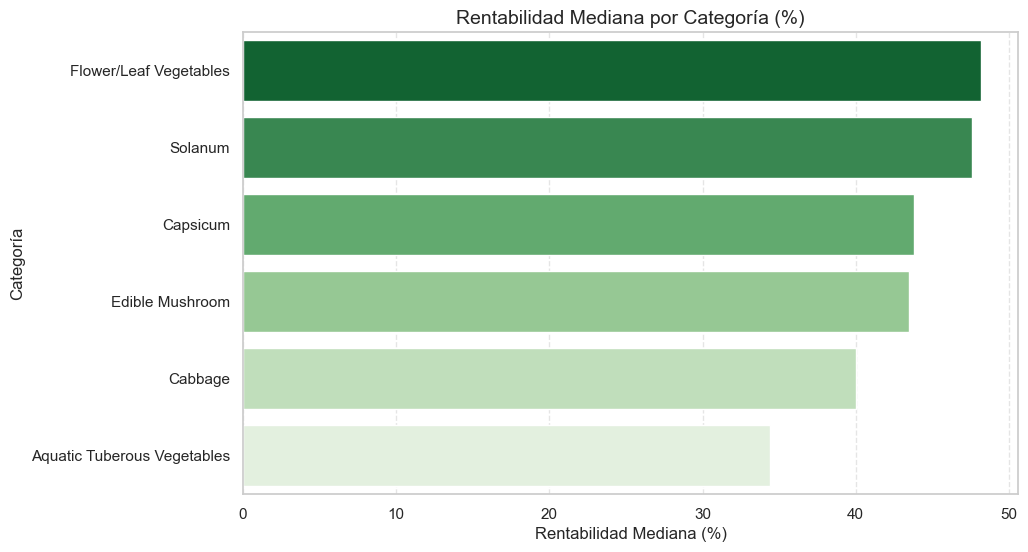

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# 1️⃣ Calcular mediana de rentabilidad por categoría
# ===============================
rentabilidad_mediana = (
    merged.groupby('Category Name')['Rentabilidad (%)']
    .median()
    .sort_values(ascending=False)
)

print("📊 Rentabilidad mediana por categoría (%):")
print(rentabilidad_mediana)

# ===============================
# 2️⃣ Visualización
# ===============================
plt.figure(figsize=(10,6))
sns.barplot(
    x=rentabilidad_mediana.values,
    y=rentabilidad_mediana.index,
    palette="Greens_r"
)
plt.title("Rentabilidad Mediana por Categoría (%)", fontsize=14)
plt.xlabel("Rentabilidad Mediana (%)")
plt.ylabel("Categoría")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


C:\Users\nicog\AppData\Local\Temp\ipykernel_34312\1129065554.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


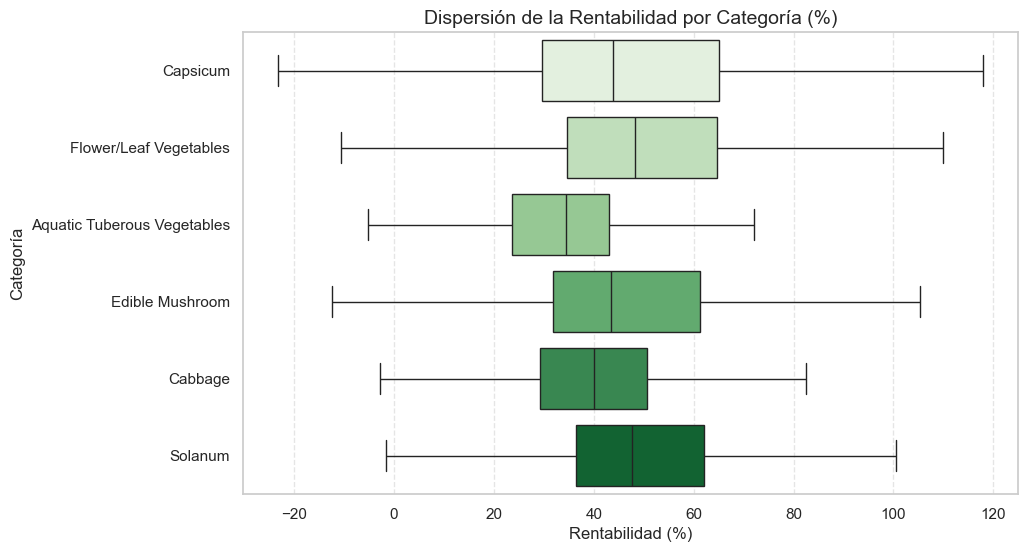

In [39]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=merged,
    x='Rentabilidad (%)',
    y='Category Name',
    palette='Greens',
    showfliers=False  # opcional: oculta los outliers extremos para ver mejor el cuerpo central
)
plt.title("Dispersión de la Rentabilidad por Categoría (%)", fontsize=14)
plt.xlabel("Rentabilidad (%)")
plt.ylabel("Categoría")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


In [40]:
# Revisar rango de fechas en el dataset
merged['Date'] = pd.to_datetime(merged['Date'])
print("Rango temporal de las ventas:")
print(f"Desde: {merged['Date'].min().date()}  Hasta: {merged['Date'].max().date()}")


Rango temporal de las ventas:
Desde: 2020-07-01  Hasta: 2023-06-30


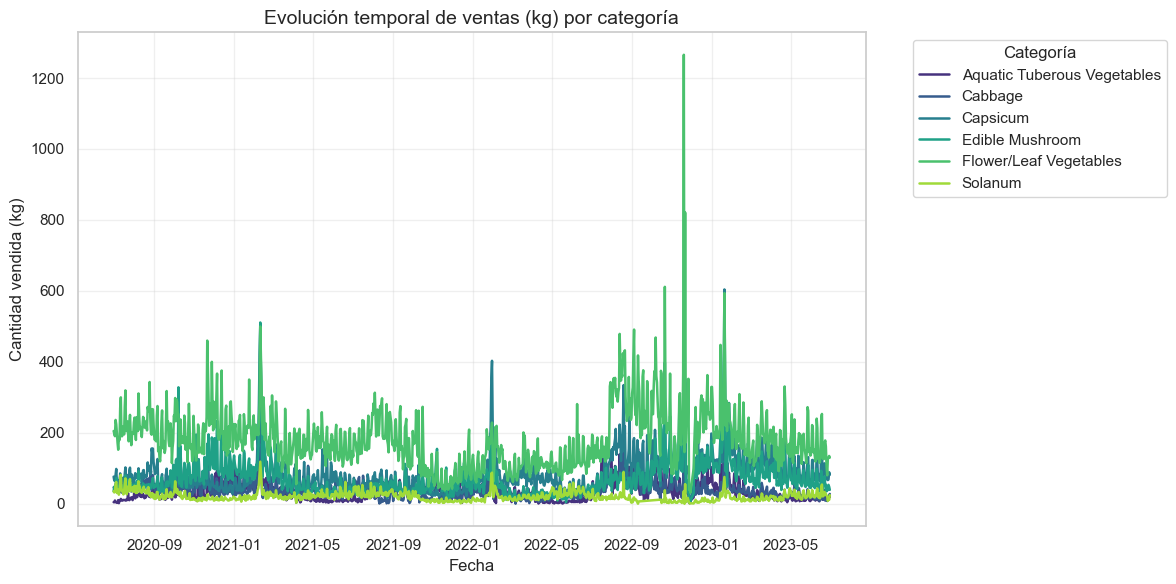

In [41]:
# Agregar ventas diarias por categoría
ventas_diarias = (
    merged.groupby(['Date', 'Category Name'])['Quantity Sold (kilo)']
    .sum()
    .reset_index()
)

# Graficar
plt.figure(figsize=(12,6))
sns.lineplot(
    data=ventas_diarias,
    x='Date',
    y='Quantity Sold (kilo)',
    hue='Category Name',
    palette='viridis',
    linewidth=1.8
)

plt.title("Evolución temporal de ventas (kg) por categoría", fontsize=14)
plt.xlabel("Fecha")
plt.ylabel("Cantidad vendida (kg)")
plt.legend(title="Categoría", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


C:\Users\nicog\AppData\Local\Temp\ipykernel_34312\1148429582.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  merged.groupby([pd.Grouper(key='Date', freq='M'), 'Category Name'])['Quantity Sold (kilo)']


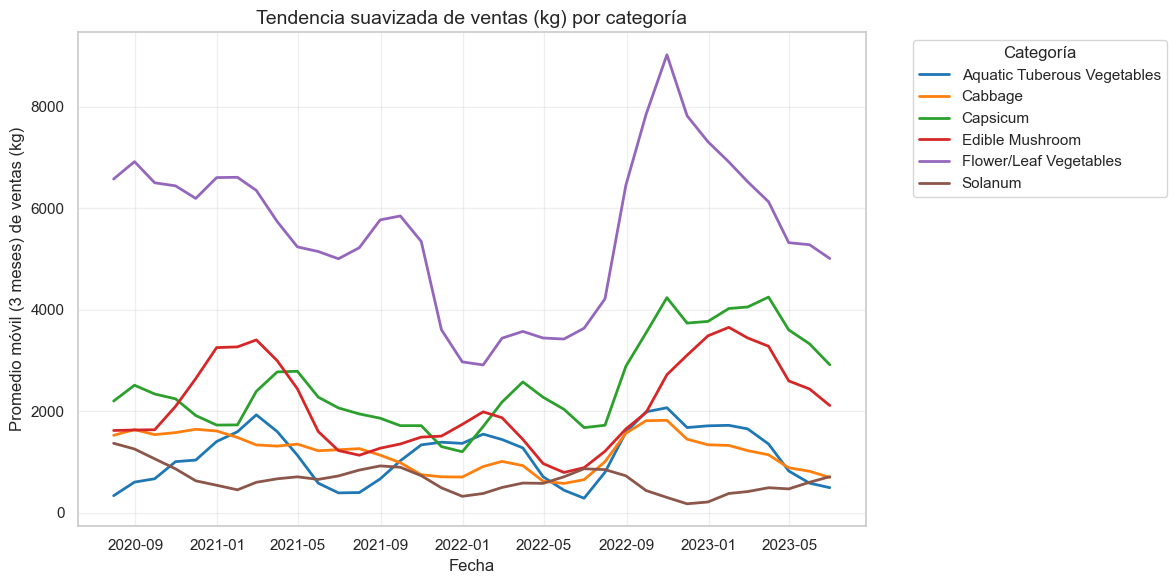

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurar que la columna de fecha esté en formato datetime
merged['Date'] = pd.to_datetime(merged['Date'])

# Agrupar ventas mensuales por categoría
ventas_mensuales = (
    merged.groupby([pd.Grouper(key='Date', freq='M'), 'Category Name'])['Quantity Sold (kilo)']
    .sum()
    .reset_index()
)

# Aplicar promedio móvil de 3 meses
ventas_mensuales['Cantidad_suavizada'] = (
    ventas_mensuales.groupby('Category Name')['Quantity Sold (kilo)']
    .transform(lambda x: x.rolling(3, min_periods=1).mean())
)

# Gráfico suavizado con colores más contrastantes
plt.figure(figsize=(12,6))
sns.lineplot(
    data=ventas_mensuales,
    x='Date',
    y='Cantidad_suavizada',
    hue='Category Name',
    linewidth=2,
    palette='tab10'  # paleta con colores bien diferenciados
)

plt.title("Tendencia suavizada de ventas (kg) por categoría", fontsize=14)
plt.xlabel("Fecha")
plt.ylabel("Promedio móvil (3 meses) de ventas (kg)")
plt.grid(alpha=0.3)
plt.legend(title="Categoría", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



C:\Users\nicog\AppData\Local\Temp\ipykernel_34312\1057668352.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  merged.groupby([pd.Grouper(key='Date', freq='M'), 'Category Name'])['Ventas_USD']


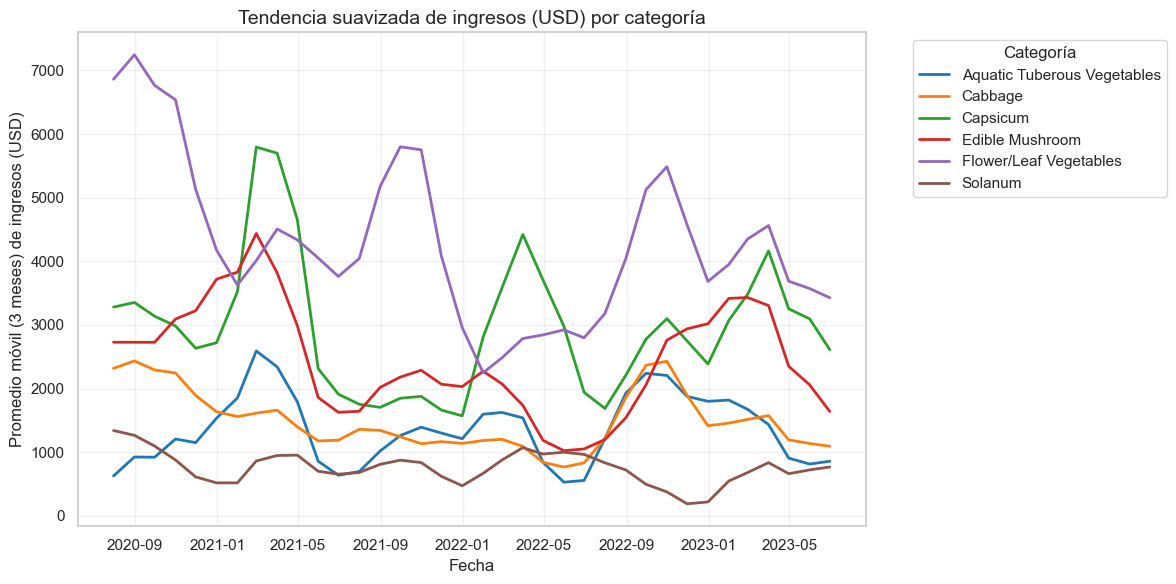

In [47]:
# Conversión de RMB a USD (1 RMB ≈ 0.14 USD)
merged['Unit Selling Price (USD/kg)'] = merged['Unit Selling Price (RMB/kg)'] * 0.14
merged['Wholesale Price (USD/kg)'] = merged['Wholesale Price (RMB/kg)'] * 0.14

# Calcular valor total en USD
merged['Ventas_USD'] = merged['Quantity Sold (kilo)'] * merged['Unit Selling Price (USD/kg)']

# Agrupar por mes y categoría
ventas_valor_usd = (
    merged.groupby([pd.Grouper(key='Date', freq='M'), 'Category Name'])['Ventas_USD']
    .sum()
    .reset_index()
)

# Suavizar con promedio móvil de 3 meses
ventas_valor_usd['Ventas_suavizadas'] = (
    ventas_valor_usd.groupby('Category Name')['Ventas_USD']
    .transform(lambda x: x.rolling(3, min_periods=1).mean())
)

# Graficar
plt.figure(figsize=(12,6))
sns.lineplot(
    data=ventas_valor_usd,
    x='Date',
    y='Ventas_suavizadas',
    hue='Category Name',
    linewidth=2,
    palette='tab10'
)

plt.title("Tendencia suavizada de ingresos (USD) por categoría", fontsize=14)
plt.xlabel("Fecha")
plt.ylabel("Promedio móvil (3 meses) de ingresos (USD)")
plt.grid(alpha=0.3)
plt.legend(title="Categoría", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [48]:
# Asegurarse de que la fecha esté en formato datetime
merged['Date'] = pd.to_datetime(merged['Date'])

# Extraer el nombre del día de la semana (en inglés por defecto)
merged['DayOfWeek'] = merged['Date'].dt.day_name()

# Para mantener el orden lógico
order_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


In [49]:
# Agrupar ventas por día de la semana
ventas_dia = (
    merged.groupby('DayOfWeek')['Ventas_USD']
    .sum()
    .reindex(order_dias)
    .reset_index()
)


C:\Users\nicog\AppData\Local\Temp\ipykernel_34312\1031733249.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


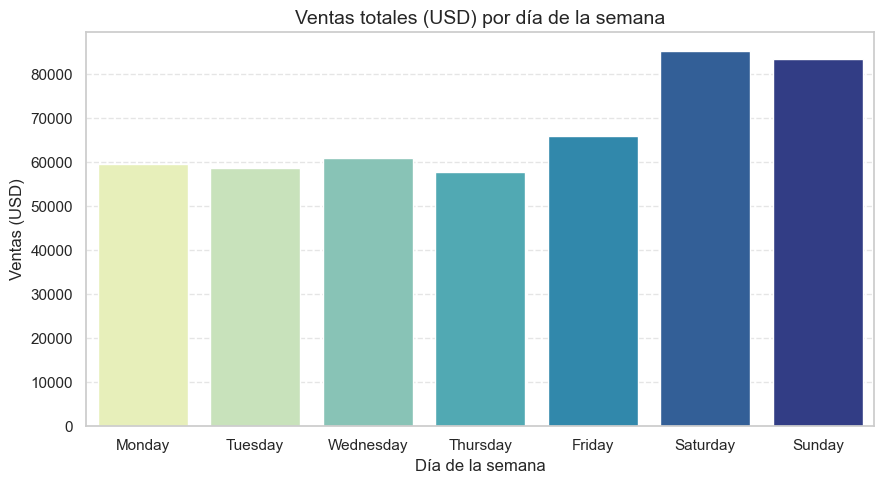

In [52]:
plt.figure(figsize=(9,5))
sns.barplot(
    data=ventas_dia,
    x='DayOfWeek',
    y='Ventas_USD',
    palette='YlGnBu'
)

plt.title("Ventas totales (USD) por día de la semana", fontsize=14)
plt.xlabel("Día de la semana")
plt.ylabel("Ventas (USD)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\nicog\AppData\Local\Temp\ipykernel_34312\3254100637.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged.groupby(['Item Name', 'DayOfWeek'])['Ventas_USD']


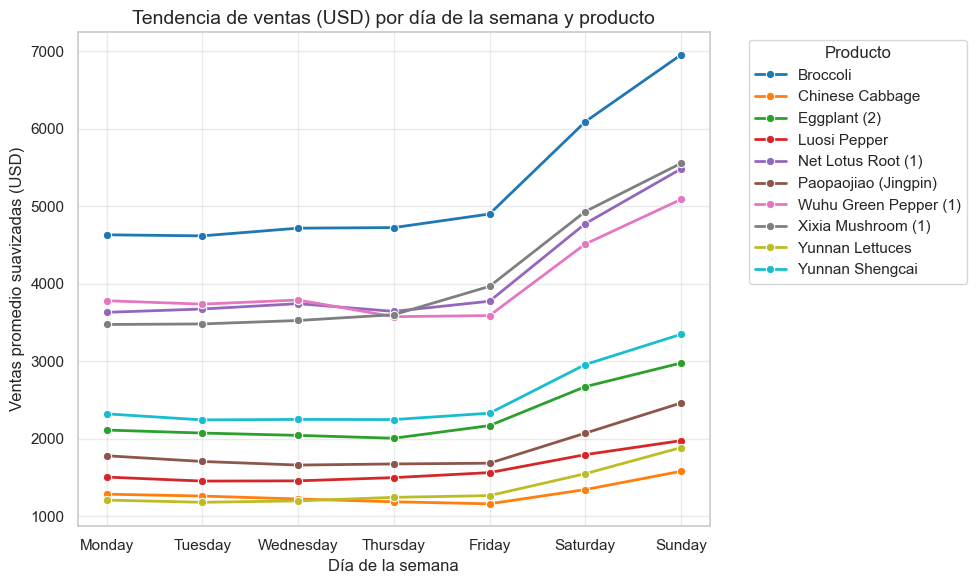

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurar formato datetime y crear columna de día
merged['Date'] = pd.to_datetime(merged['Date'])
merged['DayOfWeek'] = merged['Date'].dt.day_name()

# Orden lógico de los días
order_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
merged['DayOfWeek'] = pd.Categorical(merged['DayOfWeek'], categories=order_dias, ordered=True)

# Agrupar ventas totales por producto y día
ventas_prod_dia = (
    merged.groupby(['Item Name', 'DayOfWeek'])['Ventas_USD']
    .sum()
    .reset_index()
)

# Suavizado ligero (rolling de 2 puntos)
ventas_prod_dia['Ventas_suavizadas'] = (
    ventas_prod_dia.groupby('Item Name')['Ventas_USD']
    .transform(lambda x: x.rolling(2, min_periods=1).mean())
)

# Seleccionar los 5 productos más vendidos
top5_productos = (
    merged.groupby('Item Name')['Ventas_USD']
    .sum()
    .nlargest(10)
    .index
)
ventas_top = ventas_prod_dia[ventas_prod_dia['Item Name'].isin(top5_productos)]

# Graficar
plt.figure(figsize=(10,6))
sns.lineplot(
    data=ventas_top,
    x='DayOfWeek',
    y='Ventas_suavizadas',
    hue='Item Name',
    linewidth=2,
    marker='o',
    palette='tab10'
)

plt.title("Tendencia de ventas (USD) por día de la semana y producto", fontsize=14)
plt.xlabel("Día de la semana")
plt.ylabel("Ventas promedio suavizadas (USD)")
plt.xticks(rotation=0)  # mantener etiquetas horizontales
plt.grid(alpha=0.4)
plt.legend(title="Producto", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


C:\Users\nicog\AppData\Local\Temp\ipykernel_34312\2883545052.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged.groupby(['Category Name', 'DayOfWeek'])['Ventas_USD']


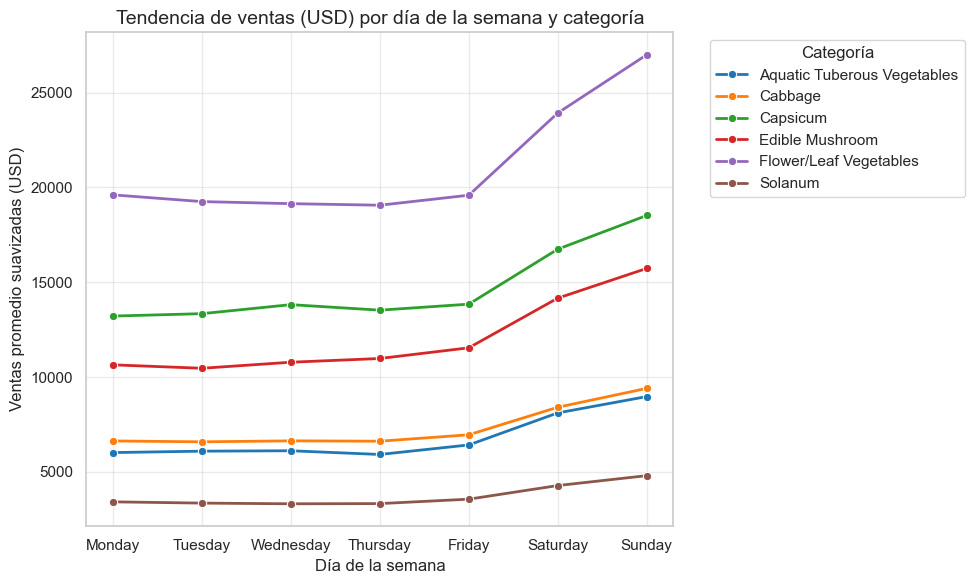

In [60]:
# Asegurar que la fecha esté bien y el día esté ordenado
merged['Date'] = pd.to_datetime(merged['Date'])
merged['DayOfWeek'] = merged['Date'].dt.day_name()

order_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
merged['DayOfWeek'] = pd.Categorical(merged['DayOfWeek'], categories=order_dias, ordered=True)

# Agrupar ventas totales por categoría y día de la semana
ventas_cat_dia = (
    merged.groupby(['Category Name', 'DayOfWeek'])['Ventas_USD']
    .sum()
    .reset_index()
)

# Suavizado con rolling de 2 puntos
ventas_cat_dia['Ventas_suavizadas'] = (
    ventas_cat_dia.groupby('Category Name')['Ventas_USD']
    .transform(lambda x: x.rolling(2, min_periods=1).mean())
)

# Gráfico
plt.figure(figsize=(10,6))
sns.lineplot(
    data=ventas_cat_dia,
    x='DayOfWeek',
    y='Ventas_suavizadas',
    hue='Category Name',
    linewidth=2,
    marker='o',
    palette='tab10'
)

plt.title("Tendencia de ventas (USD) por día de la semana y categoría", fontsize=14)
plt.xlabel("Día de la semana")
plt.ylabel("Ventas promedio suavizadas (USD)")
plt.xticks(rotation=0)
plt.grid(alpha=0.4)
plt.legend(title="Categoría", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Limpiar la columna de hora quitando los milisegundos
merged['Time_clean'] = merged['Time'].astype(str).str.extract(r'(\d{2}:\d{2}:\d{2})')

# Convertir a datetime (solo hora)
merged['Hour'] = pd.to_datetime(merged['Time_clean'], format='%H:%M:%S', errors='coerce').dt.hour

# Revisar distribución
print(merged['Hour'].value_counts().sort_index())


Series([], Name: count, dtype: int64)


In [68]:
merged['Time'].notna().sum(), merged['Time'].unique()[:10]


(np.int64(0),
 <DatetimeArray>
 ['NaT']
 Length: 1, dtype: datetime64[ns])

In [69]:
# Verificar cuál contiene la hora original
print(annex2_df.columns)
print(annex3_df.columns)
print(annex4_df.columns)


Index(['Date', 'Time', 'Item Code', 'Quantity Sold (kilo)',
       'Unit Selling Price (RMB/kg)', 'Sale or Return', 'Discount (Yes/No)'],
      dtype='object')
Index(['Date', 'Item Code', 'Wholesale Price (RMB/kg)'], dtype='object')
Index(['Item Code', 'Item Name', 'Loss Rate (%)'], dtype='object')


In [70]:
# Merge completo conservando 'Time' desde annex2_df
merged = (
    annex2_df
    .merge(annex3_df, on=['Date', 'Item Code'], how='left')  # agrega Wholesale Price
    .merge(annex4_df[['Item Code', 'Item Name', 'Loss Rate (%)']], on='Item Code', how='left')  # agrega nombre y pérdida
    .merge(annex1_df[['Item Code', 'Category Name']], on='Item Code', how='left')  # agrega categoría
)


In [71]:
# Calcular costo ajustado y rentabilidad
merged['Costo ajustado'] = merged['Wholesale Price (RMB/kg)'] * (1 + merged['Loss Rate (%)']/100)
merged['Rentabilidad (%)'] = ((merged['Unit Selling Price (RMB/kg)'] - merged['Costo ajustado'])
                              / merged['Costo ajustado']) * 100


In [72]:
print(merged[['Date', 'Time']].head(10))


         Date          Time
0  2020-07-01  09:15:07.924
1  2020-07-01  09:17:27.295
2  2020-07-01  09:17:33.905
3  2020-07-01  09:19:45.450
4  2020-07-01  09:20:23.686
5  2020-07-01  09:21:55.556
6  2020-07-01  09:21:56.536
7  2020-07-01  09:22:01.274
8  2020-07-01  09:22:01.476
9  2020-07-01  09:22:15.998


In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Limpiar y extraer solo la parte de hora (HH:MM:SS)
merged['Time_clean'] = merged['Time'].astype(str).str.extract(r'(\d{2}:\d{2}:\d{2})')

# Convertir a datetime y extraer la hora (entera)
merged['Hour'] = pd.to_datetime(merged['Time_clean'], format='%H:%M:%S', errors='coerce').dt.hour

# Verificar
print(merged['Hour'].value_counts().sort_index())


Hour
8          1
9      74038
10    120912
11     94733
12     49177
13     35600
14     41797
15     62129
16     82749
17     92771
18     89754
19     62268
20     53446
21     18862
22       265
23         1
Name: count, dtype: int64


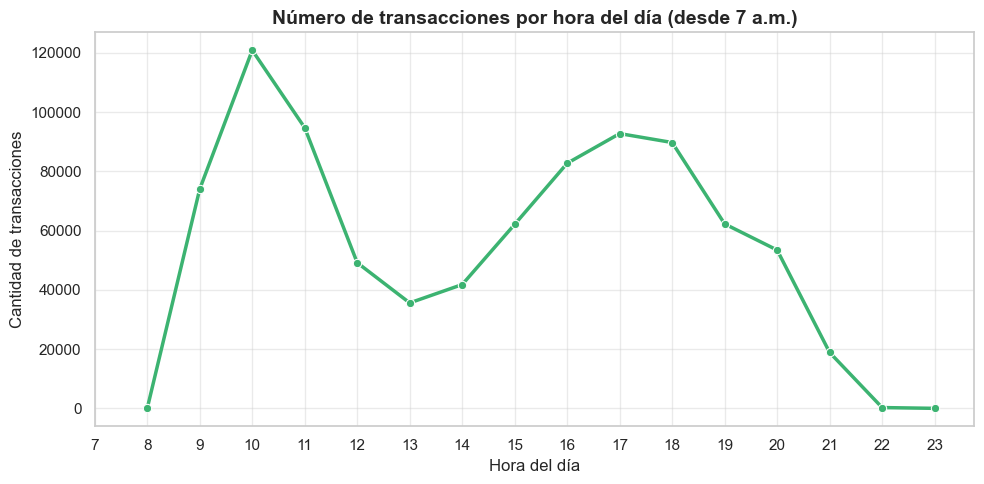

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo desde las 7:00 en adelante
ventas_hora_filtrado = ventas_hora[ventas_hora['Hour'] >= 7]

# Gráfico
plt.figure(figsize=(10,5))
sns.lineplot(
    data=ventas_hora_filtrado,
    x='Hour',
    y='Num_Transacciones',
    marker='o',
    linewidth=2.5,
    color='mediumseagreen'
)

plt.title("Número de transacciones por hora del día (desde 7 a.m.)", fontsize=14, weight='bold')
plt.xlabel("Hora del día")
plt.ylabel("Cantidad de transacciones")
plt.xticks(range(7, 24))
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()


In [76]:
# Calcular número de transacciones por día
transacciones_dia = (
    merged.groupby('Date')['Item Code']
    .count()
    .reset_index()
    .rename(columns={'Item Code': 'Num_Transacciones'})
)

transacciones_dia.head()


,Date,Num_Transacciones
0,2020-07-01,1002
1,2020-07-02,974
2,2020-07-03,965
3,2020-07-04,1231
4,2020-07-05,1296


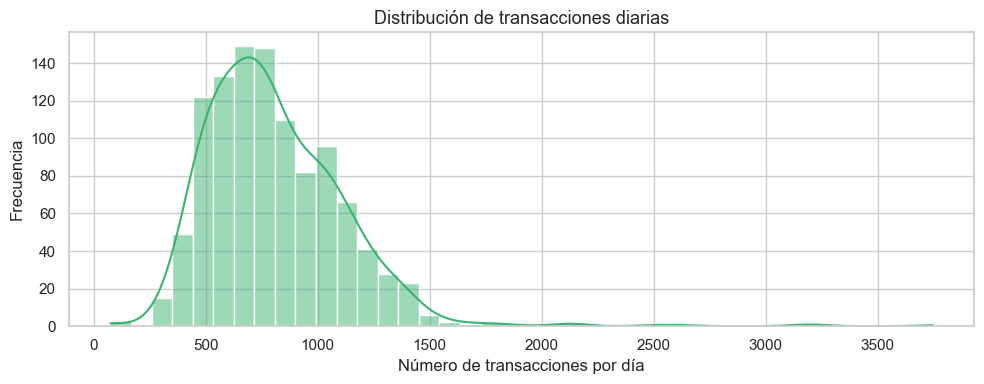

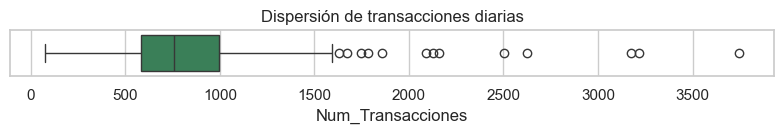

In [77]:
plt.figure(figsize=(10,4))
sns.histplot(transacciones_dia['Num_Transacciones'], bins=40, color='mediumseagreen', kde=True)
plt.title("Distribución de transacciones diarias", fontsize=13)
plt.xlabel("Número de transacciones por día")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# Boxplot para ver outliers
plt.figure(figsize=(8,1.5))
sns.boxplot(x=transacciones_dia['Num_Transacciones'], color='seagreen')
plt.title("Dispersión de transacciones diarias")
plt.tight_layout()
plt.show()


In [78]:
media = transacciones_dia['Num_Transacciones'].mean()
mediana = transacciones_dia['Num_Transacciones'].median()
q1 = transacciones_dia['Num_Transacciones'].quantile(0.25)
q3 = transacciones_dia['Num_Transacciones'].quantile(0.75)
p75 = transacciones_dia['Num_Transacciones'].quantile(0.75)
p90 = transacciones_dia['Num_Transacciones'].quantile(0.90)

print(f"Media: {media:,.0f}")
print(f"Mediana: {mediana:,.0f}")
print(f"Rango intercuartílico: {q1:,.0f} - {q3:,.0f}")
print(f"Percentil 75: {p75:,.0f}")
print(f"Percentil 90: {p90:,.0f}")


Media: 810
Mediana: 759
Rango intercuartílico: 585 - 995
Percentil 75: 995
Percentil 90: 1,183


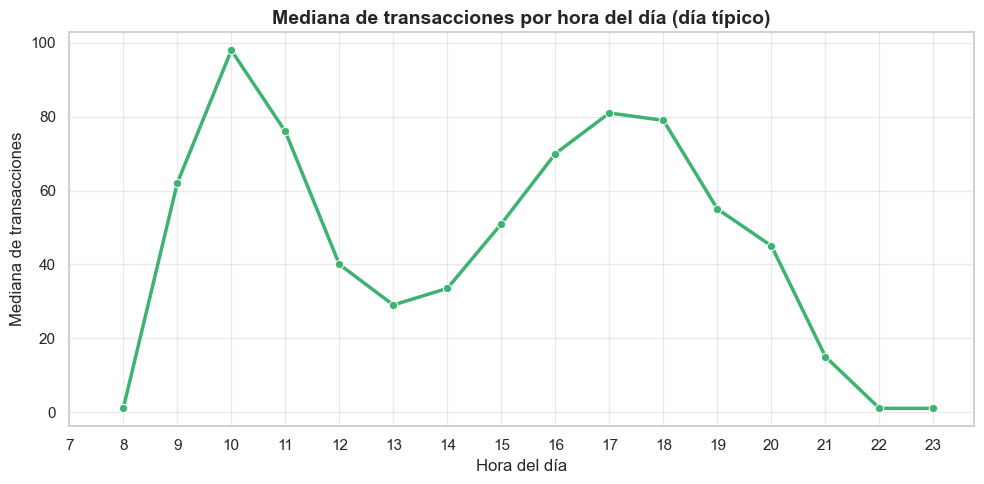

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Convertir columna Time a datetime y extraer la hora ---
merged['Time'] = pd.to_datetime(merged['Time'], errors='coerce', format='%H:%M:%S.%f')
merged['Hour'] = merged['Time'].dt.hour

# --- Agrupar por día y hora para obtener cantidad de transacciones ---
transacciones_hora = (
    merged.groupby(['Date', 'Hour'])['Item Code']
    .count()
    .reset_index()
    .rename(columns={'Item Code': 'Num_Transacciones'})
)

# --- Calcular mediana por hora (día típico) ---
mediana_hora = (
    transacciones_hora.groupby('Hour')['Num_Transacciones']
    .median()
    .reset_index()
)

# --- Filtrar desde las 7 a.m. ---
mediana_hora = mediana_hora[mediana_hora['Hour'] >= 7]

# --- Graficar ---
plt.figure(figsize=(10,5))
sns.lineplot(
    data=mediana_hora,
    x='Hour',
    y='Num_Transacciones',
    marker='o',
    linewidth=2.5,
    color='mediumseagreen'
)

plt.title("Mediana de transacciones por hora del día (día típico)", fontsize=14, weight='bold')
plt.xlabel("Hora del día")
plt.ylabel("Mediana de transacciones")
plt.xticks(range(7, 24))
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()


🔻 Productos con mayor pérdida económica estimada (USD):
Item Name
Xixia Mushroom (1)       3077.072051
Broccoli                 2545.952172
Yunnan Shengcai          1963.042455
Net Lotus Root (1)       1222.217660
Wuhu Green Pepper (1)    1212.258847
Chinese Cabbage          1064.945675
Qinggengsanhua           1023.413594
Spinach                  1014.131403
Yunnan Lettuces           865.358705
Luosi Pepper              845.159781
Name: Perdida_USD, dtype: float64


C:\Users\nicog\AppData\Local\Temp\ipykernel_34312\767890513.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


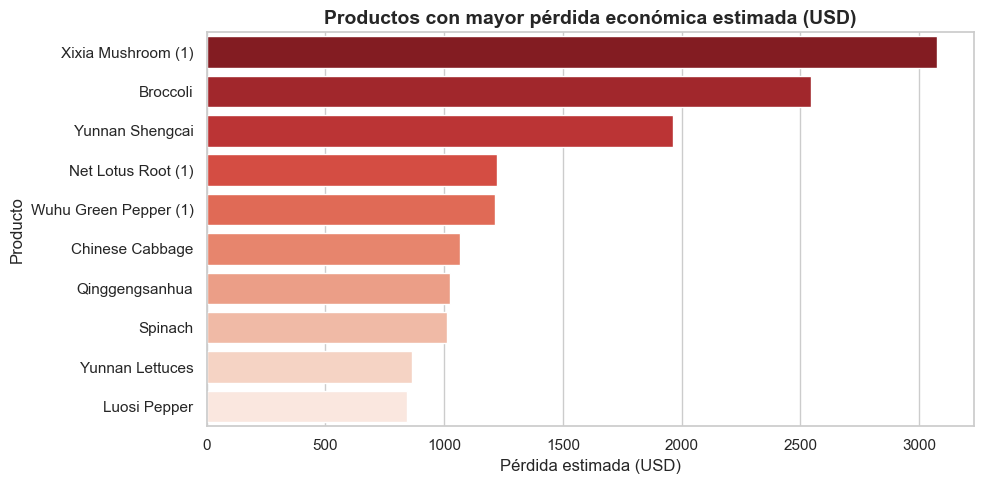


💸 Pérdida económica total estimada: $32,948.60 USD


In [92]:
# Conversión de RMB a USD (1 RMB ≈ 0.14 USD)
merged['Unit Selling Price (USD/kg)'] = merged['Unit Selling Price (RMB/kg)'] * 0.14
merged['Wholesale Price (USD/kg)'] = merged['Wholesale Price (RMB/kg)'] * 0.14

# Cálculo del costo ajustado (en USD)
merged['Costo ajustado (USD)'] = merged['Wholesale Price (USD/kg)'] * (1 + merged['Loss Rate (%)'] / 100)

# Rentabilidad en USD
merged['Rentabilidad (%)'] = (
    (merged['Unit Selling Price (USD/kg)'] - merged['Costo ajustado (USD)']) /
    merged['Costo ajustado (USD)']
) * 100

# Cálculo de pérdida económica estimada (en USD)
merged['Perdida_USD'] = merged['Costo ajustado (USD)'] * (merged['Loss Rate (%)'] / 100) * merged['Quantity Sold (kilo)']

# Agrupar por producto para ver los más costosos
perdida_producto_usd = (
    merged.groupby('Item Name')['Perdida_USD']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print("🔻 Productos con mayor pérdida económica estimada (USD):")
print(perdida_producto_usd)

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(
    y=perdida_producto_usd.index,
    x=perdida_producto_usd.values,
    palette='Reds_r'
)
plt.title("Productos con mayor pérdida económica estimada (USD)", fontsize=14, weight='bold')
plt.xlabel("Pérdida estimada (USD)")
plt.ylabel("Producto")
plt.tight_layout()
plt.show()

# Pérdida total
total_perdida_usd = merged['Perdida_USD'].sum()
print(f"\n💸 Pérdida económica total estimada: ${total_perdida_usd:,.2f} USD")


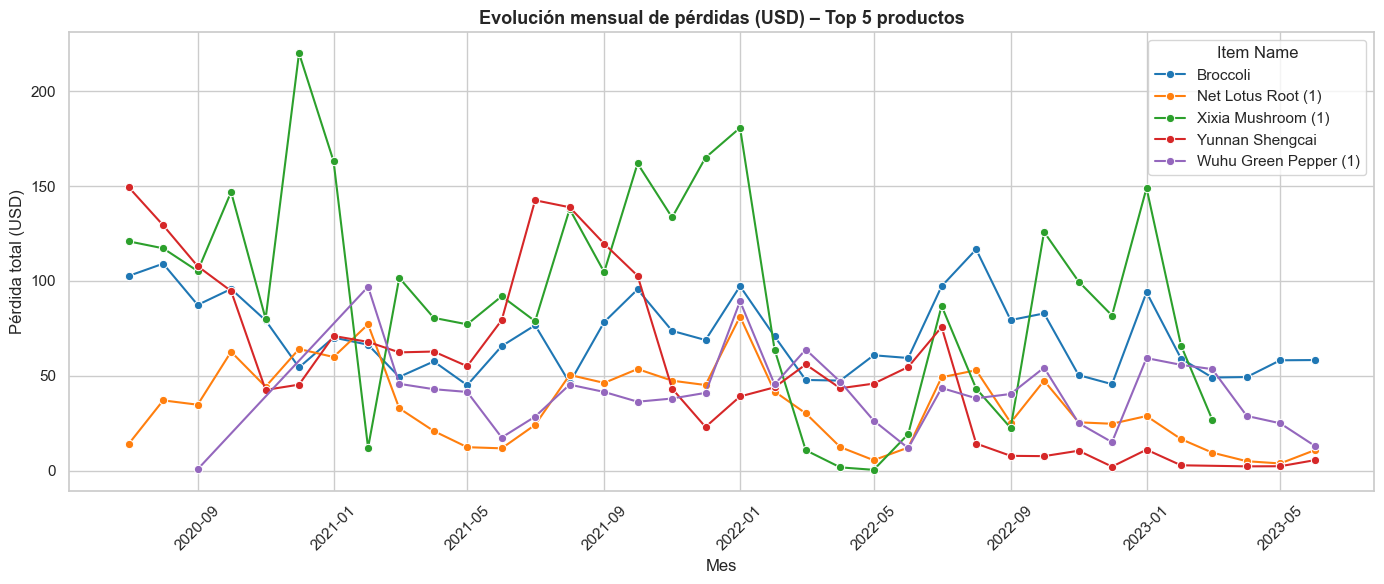

In [96]:
# ===============================
# CONFIGURACIÓN PERSONALIZABLE 🔧
# ===============================
TOP_N = 5          # 👉 cantidad de productos a mostrar
FILTRO_CATEGORIA = None   # 👉 ej. "Capsicum" o None para mostrar todas
PALETA = "tab10"    # 👉 opciones: "tab10", "Set2", "husl", "coolwarm"

# ===============================
# CÁLCULO BASE
# ===============================
df_plot = merged.copy()

# Si quieres filtrar por categoría
if FILTRO_CATEGORIA:
    df_plot = df_plot[df_plot["Category Name"] == FILTRO_CATEGORIA]

# Top N productos con más pérdidas
top_items = (
    df_plot.groupby("Item Name")["Perdida_USD"]
    .sum()
    .sort_values(ascending=False)
    .head(TOP_N)
    .index
)

# Filtrar solo esos productos
df_top = df_plot[df_plot["Item Name"].isin(top_items)].copy()

# Crear columna mensual
df_top["Mes"] = pd.to_datetime(df_top["Date"]).dt.to_period("M")

# Agrupar pérdidas por mes y producto
perdida_mensual = (
    df_top.groupby(["Mes", "Item Name"])["Perdida_USD"]
    .sum()
    .reset_index()
)

# Asegurar tipos correctos
perdida_mensual["Perdida_USD"] = pd.to_numeric(perdida_mensual["Perdida_USD"], errors="coerce")
perdida_mensual.dropna(subset=["Perdida_USD"], inplace=True)
perdida_mensual["Mes"] = pd.to_datetime(perdida_mensual["Mes"].astype(str), format="%Y-%m")

# ===============================
# GRÁFICO
# ===============================
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))
sns.lineplot(
    data=perdida_mensual,
    x="Mes",
    y="Perdida_USD",
    hue="Item Name",
    marker="o",
    palette=PALETA
)
titulo = f"Evolución mensual de pérdidas (USD) – Top {TOP_N} productos"
if FILTRO_CATEGORIA:
    titulo += f" – Categoría: {FILTRO_CATEGORIA}"

plt.title(titulo, fontsize=13, weight="bold")
plt.xlabel("Mes")
plt.ylabel("Pérdida total (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [97]:
merged.groupby("Discount (Yes/No)")["Quantity Sold (kilo)"].mean()


Discount (Yes/No)
No     0.528462
Yes    0.670352
Name: Quantity Sold (kilo), dtype: float64

C:\Users\nicog\AppData\Local\Temp\ipykernel_34312\777789217.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


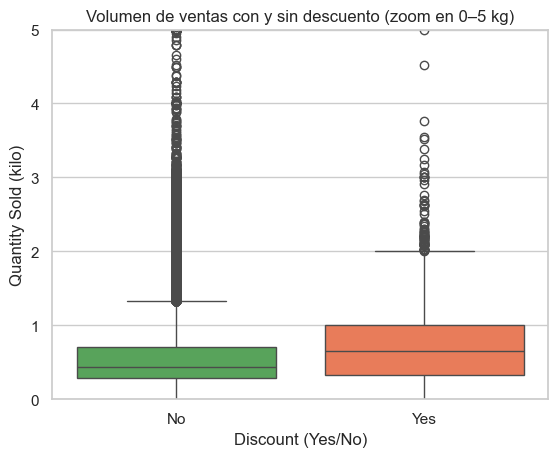

In [99]:
sns.boxplot(
    data=merged,
    x="Discount (Yes/No)",
    y="Quantity Sold (kilo)",
    palette=["#4CAF50", "#FF7043"]
)
plt.ylim(0, 5)  # 👈 limita para ver la zona donde están la mayoría
plt.title("Volumen de ventas con y sin descuento (zoom en 0–5 kg)")
plt.show()


In [100]:
merged.loc[merged["Quantity Sold (kilo)"] < 0, ["Sale or Return"]].value_counts()


Sale or Return
return            461
Name: count, dtype: int64

In [101]:
merged["Tipo_Transaccion"] = merged["Sale or Return"].map({
    "sale": "Venta",
    "return": "Devolución"
})


In [102]:
merged.groupby("Tipo_Transaccion")["Quantity Sold (kilo)"].sum()


Tipo_Transaccion
Devolución      -299.921
Venta         471275.839
Name: Quantity Sold (kilo), dtype: float64

In [103]:
devoluciones = merged[merged["Tipo_Transaccion"] == "Devolución"]
top_devoluciones = (
    devoluciones.groupby("Item Name")["Quantity Sold (kilo)"]
    .sum()
    .abs()
    .sort_values(ascending=False)
    .head(10)
)
print(top_devoluciones)


Item Name
Wawacai                             20.000
Broccoli                            18.717
Wuhu Green Pepper (1)               17.410
Net Lotus Root (1)                  17.019
Powcan Mountain Chinese Cabbage     16.316
Millet Pepper (Bag)                 14.000
Chinese Cabbage                     10.736
Yunnan Lettuce (Bag)                10.000
Xixia Mushroom (1)                   8.873
Yunnan Leaf Lettuce (Bag)            8.000
Name: Quantity Sold (kilo), dtype: float64


C:\Users\nicog\AppData\Local\Temp\ipykernel_34312\1485216063.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


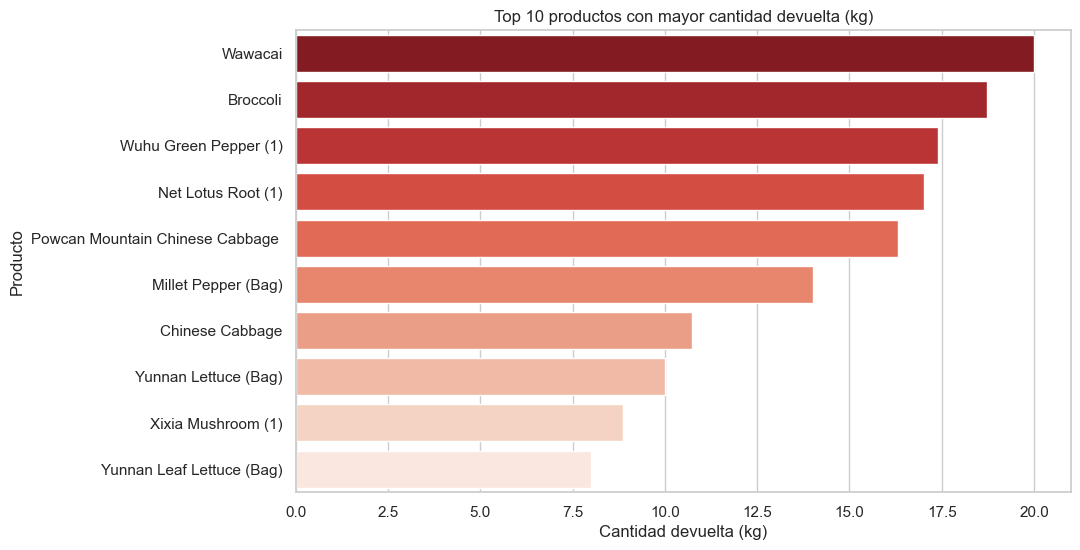

In [104]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=top_devoluciones.values,
    y=top_devoluciones.index,
    palette="Reds_r"
)
plt.title("Top 10 productos con mayor cantidad devuelta (kg)")
plt.xlabel("Cantidad devuelta (kg)")
plt.ylabel("Producto")
plt.show()


In [105]:
merged.groupby(["Category Name", "Discount (Yes/No)"])["Quantity Sold (kilo)"].mean().unstack()


Discount (Yes/No),No,Yes
Category Name,,
Aquatic Tuberous Vegetables,0.698723,0.630228
Cabbage,0.482500,0.481731
Capsicum,0.429108,0.745073
Edible Mushroom,0.510046,0.542848
Flower/Leaf Vegetables,0.587131,0.803659
Solanum,0.499126,0.518145


In [106]:
merged["Descuento"] = merged["Discount (Yes/No)"].map({"Yes": 1, "No": 0})

corr = merged[["Descuento", "Quantity Sold (kilo)"]].corr().iloc[0,1]
print(f"Correlación entre descuento y volumen vendido: {corr:.3f}")


Correlación entre descuento y volumen vendido: 0.080


In [107]:
merged.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878503 entries, 0 to 878502
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Date                         878503 non-null  object        
 1   Time                         878371 non-null  datetime64[ns]
 2   Item Code                    878503 non-null  int64         
 3   Quantity Sold (kilo)         878503 non-null  float64       
 4   Unit Selling Price (RMB/kg)  878503 non-null  float64       
 5   Sale or Return               878503 non-null  object        
 6   Discount (Yes/No)            878503 non-null  object        
 7   Wholesale Price (RMB/kg)     878503 non-null  float64       
 8   Item Name                    878503 non-null  object        
 9   Loss Rate (%)                878503 non-null  float64       
 10  Category Name                878503 non-null  object        
 11  Costo ajustado            

In [108]:
merged["Date"] = pd.to_datetime(merged["Date"], errors="coerce")


In [109]:
cols_utiles = [
    "Date", "Time", "Hour",
    "Item Code", "Item Name", "Category Name",
    "Quantity Sold (kilo)",
    "Unit Selling Price (USD/kg)", "Wholesale Price (USD/kg)", "Costo ajustado (USD)",
    "Loss Rate (%)", "Rentabilidad (%)",
    "Perdida_USD", "Tipo_Transaccion", "Discount (Yes/No)"
]
merged = merged[cols_utiles]


In [111]:
print(f"De {merged['Date'].min()} hasta {merged['Date'].max()}")


De 2020-07-01 00:00:00 hasta 2023-06-30 00:00:00


In [112]:
merged.to_parquet("supermarket_clean.parquet", index=False)
